<a href="https://colab.research.google.com/github/SergeiSa/Computational-Intelligence-Slides-Fall-2020/blob/master/Google%20Colab%20notebooks/practice_02/practice_02_on_the_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 2: Four Fundamental Subspaces, SVD, Manipulability, and Identification**

---


Goals for today is to recall what SVD and apply it to particular problems.

Are goals for today:
*  Recall the SVD.
*  Apply SVD to find manipulability ellipsoids.
*  Study internal force in cable driven manipulator. 


## **Singular Value Decomposition**
The singular value decomposition of an $m\times n$ real or complex matrix $\mathbf{A}$  is a factorization of the form $\mathbf{U S V^{*}}$, where $\mathbf {U}$  is an $m\times m$ real or complex unitary matrix, $\mathbf{S}$ is an ${m\times n}$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $\mathbf {V}$ is an $n\times n$ real or complex unitary matrix. 

The diagonal entries $\sigma_{i}=\mathbf{S}_{ii}$ are known as the singular values of $\mathbf{A}$. The number of non-zero singular values is equal to the rank of $\mathbf{A}$. . Let us for now stick in to a real domain where SVD can be written as:

---

\begin{equation}
\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^T
\end{equation}

---

with matrices $\mathbf{U},\mathbf{S},\mathbf{V}$ above obeing following usefull properties:
*   Rank $r$ of matrix $\mathbf{A}$ is number of non zero singular values $\sigma_i$ ($\text{dim}\{\mathbf{S}_r\}$)
* Singular values $\sigma$ of $\mathbf{A}$ and eigenvalues $\lambda$ of $\mathbf{A^TA}$ (or $\mathbf{AA^T}$) are related as $\sigma_i = \lambda_i^2$ 
* The columns of $\mathbf{V}$ are eigenvectors of $A^TA$ called right singular vectors of $\mathbf{A}$.
* The columns of $\mathbf{U}$ are eigenvectors of $AA^T$ called left singular vecotrs of $\mathbf{A}$.
* Determinant is equal to product of eigenvalues $\det\{\mathbf{A}\} = \prod_{i=1}^r\sigma_i$

>**HW EXERCISE**: 
* Proof the statements above






### **SVD $\rightarrow$Four Fundamental Subspaces**
Outstanding is that SVD directly provides all **four fundamental subspaces** at once. 

---

\begin{equation}
\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^T = \begin{bmatrix}\underset{m \times r}{\mathbf{U}_r} & \underset{m \times m - r}{\mathbf{U}_n}
\end{bmatrix}
\begin{bmatrix}
\underset{r \times r}{\mathbf{S}_r} & \underset{r \times n - r}{\mathbf{0}} \\ 
\underset{m - r \times r}{\mathbf{0}} & 
\underset{m - r \times n - r}{\mathbf{0}}
\end{bmatrix}
\begin{bmatrix}\underset{n \times r}{\mathbf{V}_r} & \underset{n \times n -r}{\mathbf{V}_n}
\end{bmatrix}^T
= \mathbf{U}_r \mathbf{S}_r \mathbf{V}^T_r
\end{equation}

---

*   **Column space** $\mathcal{C}(\mathbf{A})$is spanned by first $r$ vectors in $\mathbf{U}_r$
*  **Left null space** $\mathcal{N}(\mathbf{A}^T)$ is spanned by $m-r$ vectors in $\mathbf{U}_n$
*   **Row space** $\mathcal{R}(\mathbf{A}^T)$is spanned by first $r$ right singular vectors in $\mathbf{V}_r$
*  **Null space** $\mathcal{N}(\mathbf{A})$ is spanned by $n-r$ vectors in $\mathbf{V}_n$




---

## **Geometrical Representation**
A Singular Value Decomposition allow the intuitive geometrical interpretation. 

<p><img alt="ff_fb" height="300px" src="https://drive.google.com/uc?id=1ptwXhFZmhZk9s6XKFtYSAzdTNaUEX-NW" align="center" hspace="100px" vspace="0px"></p>

## **Example: Manipulability Ellipsoids**

in the previous practices we have studied how to describe force and velocity mapping between task and joint spaces, particularly we focus on the null-space motion. Today we will quantify the nonlinear mapping between manipulator spaces by mean of specific indices. It is maybe intuitively done via geometric interpretation of the Jacobian SVD. Consider case of velocity bounded by it's euclidean norm: 
\begin{equation}
\|\dot{\mathbf{q}}\|_2^2 = \dot{\mathbf{q}}^T \dot{\mathbf{q}} \leq 1
\end{equation}
Now think about velocity constraints defined by mapping of the joint speeds which is nothing but transformation from the sphere in $\mathbb{R}^n$ to the ellipsoid in $\mathbb{R}^m$.



For example Let us consider the 2 dof mainpulator:

<p><img alt="ff_fb" height="300px" src="https://drive.google.com/uc?id=1LxHdxxFTz4WrPEtEb6BcRMGFdImRg7tX" align="center" hspace="350px" vspace="0px"></p>

The $i$-th column of Jacobian calculated as:
\begin{equation}
\mathbf{J}_i =
\frac{\partial \boldsymbol{x}}{\partial q_i} 
=
\sum^n_{j=i}
\ell_j
\begin{bmatrix}
 -\sin \sum^j_{k=1} q_k\\
 \cos \sum^j_{k=1} q_k
\end{bmatrix}  
\end{equation}

In [ ]:
from numpy import cos, sin, zeros, sum, pi, dot, array

def jacobian_column(q, l, i):
    jac_i = zeros(2)
    for j in range(i,len(q)):
      jac_i+=l[j]*array([-sin(sum(q[:j+1])), cos(sum(q[:j+1]))])
    return jac_i
  
def jacobian(q, l):
    jac = zeros((2,len(q)))
    for i in range(len(q)):
      jac[:,i] = jacobian_column(q, l, i)
    return jac

Let's plot the manipulablity ellipsoid in different configurations:

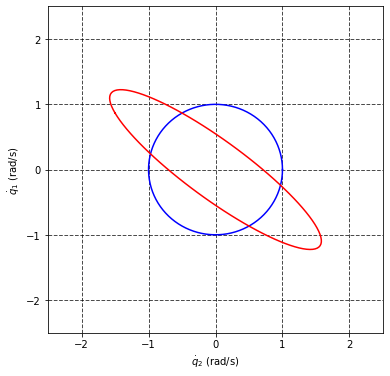

In [ ]:
from numpy import linspace
# Define a circle in joint space 
n = 100
phi = linspace(0, 1,n)
dq_circle = cos(2*pi*phi), sin(2*pi*phi)

# transform a circle by jacobian in the particular posture
q0 = pi/2,-pi/3
l = 1, 1
J = jacobian(q0, l)
dx_transformed = dot(J,dq_circle)
from matplotlib.pyplot import *
figure(figsize=(6,6))
plot(dq_circle[0], dq_circle[1], color = 'blue')
plot(dx_transformed[0], dx_transformed[1], color = 'red')
ylim([-2.5,2.5])
xlim([-2.5,2.5])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'$\dot{q}_1$ (rad/s)')
xlabel(r'$\dot{q}_2$ (rad/s)')
show()


Now we can use SVD to characterize such transformation:

 Left singular vectors U:
 [[-0.79917148  0.60110311]
 [ 0.60110311  0.79917148]]

 Singular values  S:
 [1.95007068 0.4440995 ]

 Right singular vectors V:
 [[ 0.8816746  -0.47185793]
 [ 0.47185793  0.8816746 ]]

 


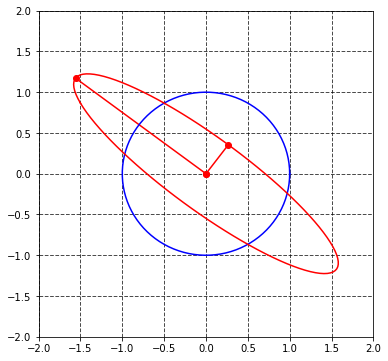

 Elipsoid semi-axes U*S:
 [[-1.55844086  0.26694959]
 [ 1.17219355  0.35491165]]



In [ ]:
from numpy.linalg import svd
from numpy import transpose
from numpy import diag
U,S,VT = svd(J)

print(f' Left singular vectors U:\n {U}\n\n Singular values  S:\n {S}\n\n Right singular vectors V:\n {VT.transpose()}\n\n ')

figure(figsize=(6,6))
plot([0, S[0]*U[0,0]], [0, S[0]*U[0,1]], color = 'red', marker = 'o')
plot([0, S[1]*U[1,0]], [0, S[1]*U[1,1]], color = 'red', marker = 'o')
plot(dq_circle[0], dq_circle[1], color = 'blue')
plot(dx_transformed[0], dx_transformed[1], color = 'red')
ylim([-2.0,2.0])
xlim([-2.0,2.0])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# ylabel(r'$\dot{q}_1$ (rad/s)')
# xlabel(r'$\dot{q}_2$ (rad/s)')
show()

print(f' Elipsoid semi-axes U*S:\n {dot(U,diag(S))}\n')


>**QUESTION**: 
What will happen in case of singular Jacobian? How you can interpret corresponding SVD physically and geometrically?

It's fairly intuitive to use this concept with $n \times n$ square matrices (not redundant manipulator), however let us now move a bit further to the general case, to do so we will perform similar analysis for the planar 3-DoF manipulator from the first practice:

<p><img alt="3DoF" height="300px" src="https://drive.google.com/uc?id=1LuXGcOe5jw8tw5TrLlma9hDbRU_opZVw" align="center" hspace="280px" vspace="0px"></p>


In [ ]:
from numpy import ones

q0 = [pi/2, -pi/4, 0]
l = ones(3)
J = jacobian(q0,l)
U,S,VT = svd(J)
print(f' Left singular vectors U:\n {U}\n\n  Singular values  S:\n {S}\n\n Right singular vectors V:\n {VT.transpose()}\n ')

print(f' Elipsoid semi-axes U*S:\n {dot(U,diag(S))}')

 Left singular vectors U:
 [[-0.80868274  0.58824504]
 [ 0.58824504  0.80868274]]

  Singular values  S:
 [3.55394055 0.44489738]

 Right singular vectors V:
 [[ 7.83422488e-01 -6.21489505e-01  2.54873123e-17]
 [ 5.55877112e-01  7.00714376e-01 -4.47213595e-01]
 [ 2.77938556e-01  3.50357188e-01  8.94427191e-01]]
 
 Elipsoid semi-axes U*S:
 [[-2.87401039  0.26170867]
 [ 2.0905879   0.35978083]]


Here a left singular vectors multiplied by a singular values denote a semi axis of ellipsoid, and last right singular vector lies in $\mathcal{N}(\mathbf{J})$

>**HW EXERCISE**: 
>*   Visualize a corresponding transformation from the 3D sphere to ellipse

>**BONUS**: 
>*   Animate a motion of manipulator for some trajectory, and display transformation of the ellipsoid.

## **Condition Number**
In order to characterize anisotropy of resulting transformation one can denote the following criteria: 
\begin{equation}
\kappa (\mathbf{A})={\frac {\sigma _{\text{max}}(\mathbf{A})}{\sigma _{\text{min}}(\mathbf{A})}}
\end{equation}

In general a condition number allow you to characterize how much the output value of the function can change for a small change in the input argument. A definition above is valid for $\ell^2$ norm:
\begin{equation}
\kappa (\mathbf{A})= {\frac {\left\|A^{-1}e\right\|}{\left\|A^{-1}b\right\|}}/{\frac {\|e\|}{\|b\|}}
\end{equation}

Condition number c 1.5468641541960593
Condition number c 2.999999999999999


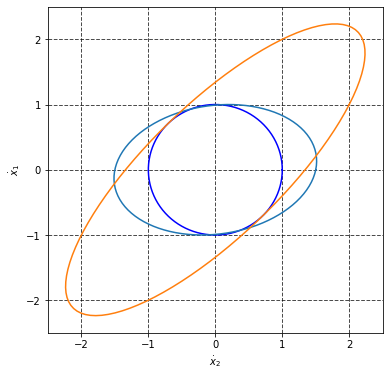

In [ ]:
from numpy.linalg import cond

A = [[1.5,0.2],[0,1]]
B = [[2,1],[1,2]]
figure(figsize=(6,6))
plot(dq_circle[0], dq_circle[1], color = 'blue')
for matrix in A, B:
  x = dot(matrix,dq_circle)
  plot(x[0], x[1])
  ylim([-2.5,2.5])
  xlim([-2.5,2.5])
  print(f'Condition number c {cond(matrix)}')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'$\dot{x}_1$')
xlabel(r'$\dot{x}_2$')
show()

  

In application to the manipulators condition number provides measure of the velocity homogeneity in task space. As closer $\kappa$ to one as velocity is more homogeneus in different directions.


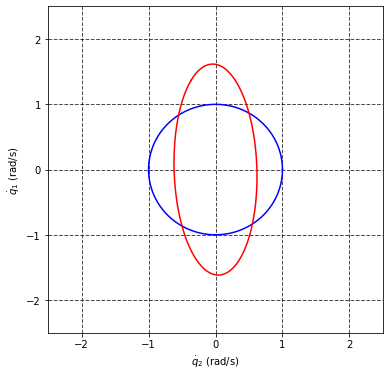

Condition number c: 2.618033988749896


In [ ]:
q0 = pi/3,-pi/2
l = 1, 1
J = jacobian(q0, l)
dx_transformed = dot(J,dq_circle)

figure(figsize=(6,6))
plot(dq_circle[0], dq_circle[1], color = 'blue')
plot(dx_transformed[0], dx_transformed[1], color = 'red')
ylim([-2.5,2.5])
xlim([-2.5,2.5])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'$\dot{q}_1$ (rad/s)')
xlabel(r'$\dot{q}_2$ (rad/s)')
show()

print(f'Condition number c: {cond(J)}')

>**HW EXERCISE**: 
>*  Plot condition number for 2 DoF manipulator as function of joint variables (3d plot). Which posture is more homogeneus in terms of speeds?

## **Example: Cable Driven Manipulator, Vector Closure**
Consider the cable driven manipulator with three cables that we discussed previously:

<p><img alt="3DoF_lin" height="300px" src="https://drive.google.com/uc?id=1rhGICXO_F1g7RdEnTwGYdzbROhly-JBy" align="center" hspace="250px" vspace="0px"></p>

with relationships between cable tensions $\boldsymbol{\tau}\in \mathbb{R}^n$ and force acting on end effector $\mathbf{F}\in \mathbb{R}^m$ given by:

\begin{equation}
\mathbf{F} = \mathbf{W}\boldsymbol{\tau} 
\end{equation}

For simplest case $\mathbf{W}$ containt columns of unit vectors  $\mathbf{e}_i$ pointing along direction of applied force $\boldsymbol{\tau}_i$.
\begin{equation}
\mathbf{W} = [\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_n]
\end{equation}



In [ ]:
from numpy.linalg import norm

e1 = [1,1]
e2 = [-1,1]
e3 = [0,-1]
W = array([e1/norm(e1),e2/norm(e2),e3/norm(e3)]).transpose()
print(W)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678 -1.        ]]


A problem to define tensions $\boldsymbol{\tau_i}$ that corresponds to zero end effector force and also being positive is defined as:
\begin{equation}
\mathbf{W}\boldsymbol{\tau} = \sum_i \mathbf{e}_i\boldsymbol{\tau}_i = \mathbf{0}
\end{equation}

For $\boldsymbol{\tau}_i >0$, and with each set of $m$ from the $\min(n) = m+1$ vectors $\mathbf{e}_i$  in $\mathbf{W}$ being linearly independent. 

This criteria is known as [**vector closure**](https://ieeexplore.ieee.org/document/1088014) since it define a set of closed vectors and is nothing but positive subset of the nullspace of $\boldsymbol{W}$. Thus to find a positive forces that do not produce any force we just need to find $\mathcal{N}(\mathbf{W})$ with all positive elements. So in order to check that system of vectors is vector closure we can perform SVD of $\mathbf{W}$

<p><img alt="3DoF_lin" height="200px" src="https://drive.google.com/uc?id=12zH6-FaQOv9y_SSeR2w7LsVxwUVoYiuw" align="center" hspace="250px" vspace="0px"></p>




In [ ]:
U, S, VT = svd(W) 
print(f' Left singular vectors U:\n {U}\n\n  Singular values  S:\n {S}\n\n Right singular vectors V:\n {VT.transpose()[:n]}\n ')

print(f' Elipsoid semi-axes U*S:\n {dot(U,diag(S))}')

 Left singular vectors U:
 [[0. 1.]
 [1. 0.]]

  Singular values  S:
 [1.41421356 1.        ]

 Right singular vectors V:
 [[ 0.5         0.70710678  0.5       ]
 [ 0.5        -0.70710678  0.5       ]
 [-0.70710678  0.          0.70710678]]
 
 Elipsoid semi-axes U*S:
 [[0.         1.        ]
 [1.41421356 0.        ]]


>**QUESTION**: 
What is physical interpretation of matrix $\mathbf{U}\mathbf{S}$


>**HW EXERCISE**: 
>
>  Formulate complete vector closure condition in terms of SVD. To do so answer a following questions:
>*  What we can say about linear dependency of vectors $\mathbf{e}$ by SVD?
>*  Why should we have a minimal $m+1$ cables to perform task in $\mathbb{R}^m$, how to describe this in terms of SVD?


---



>**HW EXERCISE**: 
> Given mechanical system with dynamics written linear to parameters ([revise here](https://colab.research.google.com/drive/1UDpCx13PppfQe4u3g0vdq7tpYxaaTujz#scrollTo=exLMblug8v92) ):
\begin{equation}
\mathbf{Q} =  
 \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}}) \mathbf{p}
\end{equation}
>where:
>* $\mathbf{Q} \in \mathbb{R}^n $ - generalized forces corresponding to 
>* $\mathbf{q} \in \mathbb{R}^{n}$ - vector of generilized coordinates
>* $\mathbf{Y} \in \mathbb{R}^{n\times p}$ is so called **regressor matrix**
>* $\mathbf{p} \in \mathbb{R}^{p}$ - is full vector of parameters. 
generalized coordinates 
>
>Try to intepretate SVD of regressor $\mathbf{Y}$ in terms of phisycal quantities ($\mathbf{Q},\mathbf{p}$). 
>
>
>Suppose that you have $N$ measurements $\dot{q}(t)_i,\ddot{q}(t)_i$ and calculate augmented regressor defined as:
>
>\begin{equation}
\bar{\mathbf{Y}} = 
\begin{bmatrix}
\mathbf{Y}(t_1) \\ 
\mathbf{Y}(t_2) \\
\cdots \\
\mathbf{Y}(t_N) 
\end{bmatrix}= 
\begin{bmatrix}
\mathbf{Y}(\mathbf{q}_1,\dot{\mathbf{q}}_1,\ddot{\mathbf{q}}_1) \\ 
\mathbf{Y}(\mathbf{q}_2,\dot{\mathbf{q}}_2,\ddot{\mathbf{q}}_2) \\ 
\cdots \\
\mathbf{Y}(\mathbf{q}_N,\dot{\mathbf{q}}_N,\ddot{\mathbf{q}}_N) 
\end{bmatrix}
\end{equation}
>
>* What will be the optimal values of parameter estimates $\hat{\mathbf{p}}$ that minimize: $\| \bar{\mathbf{Q}}^* - \bar{\mathbf{Y}}\mathbf{p} \|$? 
>* Does one can always calculate such optimal solution (identify) $\hat{\mathbf{p}}$? Answer in terms of SVD. What condition on trajectory $\mathbf{q}$ implies identifiability, propose the measure of this condition? 


---